# <span style = "color : #00FF00" > <center> **♪ Mitos y Melodías: Desenmascarando la Industria Musical ♪** </center> </span>

Se investigarán a los artistas clásicos(que generaron más impacto, son más influyentes y mayor éxito) y los artistas contemporáneos que hoy tienen éxito y están en camino a ser considerados los nuevos clásicos.

In [2]:
#Importar librerías
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [3]:
#Importar datasets
import pandas as pd
# guarda en variables los datasets y su fuente

#BEST SELLING ARTISTS OF ALL TIME
best_selling_alltime = pd.read_csv("./data/best_selling_artists.csv")
fuente_1 = "https://www.kaggle.com/datasets/kabhishm/best-selling-music-artists-of-all-time"

#TOP SONGS OF ALL TIME
top_songs_alltime = pd.read_csv("./data/Top-500-Songs.csv", encoding='latin1')
fuente_2 = "https://www.kaggle.com/datasets/omarhanyy/500-greatest-songs-of-all-time"

#SPOTIFY'S TOP 10 000 SONGS ALL TIME
spotify_top_songs = pd.read_csv("./data/spotifytop10000.csv")
fuente_3 = "https://www.kaggle.com/datasets/rakkesharv/spotify-top-10000-streamed-songs"

#SPOTIFY'S TOP ARTISTS BY LISTENERS
spotify_top_artists = pd.read_csv("./data/top-artists-by-listeners.csv", encoding = 'utf-8')
fuente_4 = "https://www.kaggle.com/datasets/meeratif/spotify-top-artists-by-monthly-listeners"

#SPOTIFY'S TOP SONGS 2023
spotify_songs2023 = pd.read_csv("./data/spotify-most-streamed2023.csv", encoding='latin1')
fuente_5 = "https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023"

#TOP SONGS 2000 - 2019
top_songs2000_2019 = pd.read_csv("./data/topsongs-2000-2019.csv")
fuente_6 = "https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019"

#MBTI TYPES (WEB)
fuente_mbti = "https://www.personality-database.com/profile?pid=1&cid=14"

#Webscrapping Paises
contempo_pais = pd.read_csv("./data/top_artistas_pais.csv", sep = ";")

In [4]:
#Limpieza
#TOP ARTISTS
best_selling_alltime.rename(columns = {"Sales":"Artists_Sales", "period_active": "Period_Active"}, inplace= True)
best_selling_alltime.drop("TCU", axis = 1, inplace= True)
    #Corrigiendo países
UK_AUS = best_selling_alltime["Country"] == "United Kingdom Australia[238][239]"
best_selling_alltime.loc[UK_AUS, "Country"] = "United Kingdom" 

USA_UK = best_selling_alltime["Country"] == "United StatesUnited Kingdom"
best_selling_alltime.loc[USA_UK, "Country"] = "United States"

UK_US = best_selling_alltime["Country"] == "United Kingdom United States"
best_selling_alltime.loc[UK_US, "Country"] = "United Kingdom"

CA_US = best_selling_alltime["Country"] == "CanadaUnited States"
best_selling_alltime.loc[CA_US, "Country"] = "Canada"
   
    #Haciendo columna con ventas en int
def ventas_a_int(ventas):
    if pd.isna(ventas):
        return np.nan
    
    num = ventas.split(' ')[0]
    if "–" in num:
        num = num.split('–')[-1]

    return int(num)

best_selling_alltime["A_Sales_Millions"] = best_selling_alltime["Artists_Sales"].apply(ventas_a_int)

#TOP SONGS OF ALL TIME
top_songs_alltime.rename(columns = {"artist":"Artist", "title": "Song_Title", "released": "Realease"}, inplace= True)
top_songs_alltime.drop(["description","appears on","writers","producer","streak", "position"], axis = 1, inplace = True)

#Spotify TOP SONGS
spotify_top_songs.rename(columns = {"Artist Name": "Artist",
                                    "Song Name":"Song_Title", 
                                    "Top 10 (xTimes)": "Top10_Times", 
                                    "Peak Position": "Peak_Position",
                                    "Peak Streams": "Peak_Streams",
                                    "Total Streams": "Total_Streams" }, inplace = True)
#spotify_top_songs.drop(["Position","Days","Peak Position (xTimes)"], axis = 1, inplace = True)

#Spotify Top Artists
spotify_top_artists.rename(columns = {"artist(s)_name": "Artist",
                                      "track_name": "Song_Title",
                                      "released_month": "Released",
                                      "streams": "Streams"}, inplace = True)

#SPOIFY's TOP 2023
spotify_songs2023.rename(columns = {"artist(s)_name": "Artist",
                                    "track_name":"Song_Title", 
                                    "released_year": "Released", 
                                    "streams": "Streams",
                                    "danceability_%": "danceability",
                                    "acousticness_%": "acousticness",
                                    "energy_%":"energy",
                                    "valence_%": "valence"}, inplace = True)

#SPOTIFY 2000-2019
top_songs2000_2019.rename(columns = {"artist": "Artist",
                                    "song":"Song_Title", 
                                    "year": "Released", 
                                    "genre": "Genre"}, inplace = True)

In [5]:
merge_best = pd.merge(best_selling_alltime, top_songs_alltime, how= "outer")
merge_best

,Artist,Country,Period_Active,Year,Genre,Artists_Sales,A_Sales_Millions,Song_Title,Realease
0,50 Cent,NaN,NaN,NaN,NaN,NaN,NaN,In Da Club,"Dec. , 2002"
1,? and the Mysterians,NaN,NaN,NaN,NaN,NaN,NaN,96 Tears,"Sept. , 1966"
2,ABBA,Sweden,"1972–1982, 2016–present",1972.0,Pop / disco,150 million,150.0,NaN,NaN
3,AC/DC,Australia,1973–present,1975.0,Hard rock / blues rock / rock and roll,200 million,200.0,Back in Black,"July, 1980"
4,AC/DC,Australia,1973–present,1975.0,Hard rock / blues rock / rock and roll,200 million,200.0,Highway to Hell,"Aug. , 1979"
...,...,...,...,...,...,...,...,...,...
573,Weezer,NaN,NaN,NaN,NaN,NaN,NaN,Buddy Holly,"Aug. , 1994"
574,Whitney Houston,United States,1977–2012,1984.0,R&B / soul / pop / gospel,200 million,200.0,NaN,NaN
575,Willie Nelson,NaN,NaN,NaN,NaN,NaN,NaN,Blue Eyes Crying in the Rain,"July , 1975"
576,Wilson Pickett,NaN,NaN,NaN,NaN,NaN,NaN,Mustang Sally,"Nov. , 1966"


In [6]:
palette = sns.color_palette("GnBu", 10)[::-1]

####  Hipótesis 1: "Los artistas clásicos son en general del Reino Unido y los artistas contemporáneos con más éxito son más de USA"

In [7]:
#Todos los tiempos
paises_clasicos = best_selling_alltime["Country"].value_counts()
pie1 =paises_clasicos[0:5]

In [8]:
#Porcentaje
print(round((paises_clasicos["United States"] / paises_clasicos.sum()) * 100,2))
print(round((paises_clasicos["United Kingdom"] / paises_clasicos.sum()) * 100,2))

66.12
18.18


In [9]:
paleta = sns.color_palette("GnBu", len(pie1))[::-1]

Text(0.5, 1.0, 'Top 5 países de artistas clásicos')

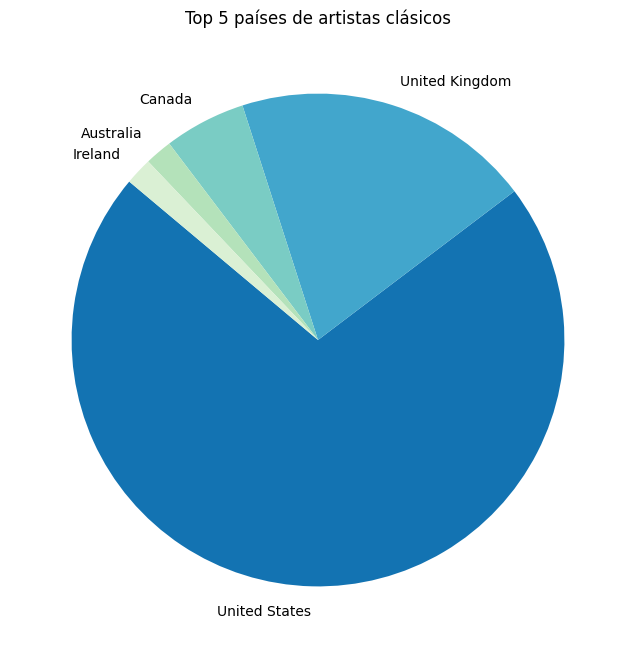

In [10]:
plt.figure(figsize=(8,8))
plt.pie(pie1, labels=pie1.index, startangle=140, colors = paleta);
plt.title('Top 5 países de artistas clásicos')

In [11]:
#Webscrapping con Selenium para los artistas contemporáneos
paises_nuevos = contempo_pais["Pais"].value_counts()
pie2 =paises_nuevos[0:5]

In [12]:
#Porcentaje
print(round((paises_nuevos["United States"] / paises_clasicos.sum()) * 100,2))
print(round((paises_nuevos["United Kingdom"] / paises_clasicos.sum()) * 100,2))

48.76
16.53


In [13]:
paleta2 = sns.color_palette("GnBu", len(pie2))[::-1]

Text(0.5, 1.0, 'Top 5 países de artistas contemporáneos')

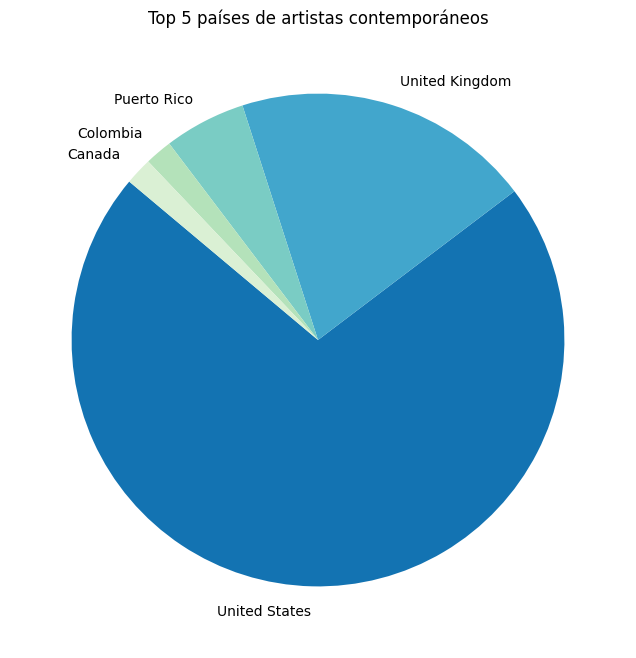

In [14]:
plt.figure(figsize=(8,8))
plt.pie(pie1, labels=pie2.index, startangle=140, colors = paleta);
plt.title('Top 5 países de artistas contemporáneos')

#### Hipótesis 1.2: "Aunque la mayoría de los artistas clásicos sean americanos, los británicos tienen en media más ventas"

In [15]:
pais_ventas_mean = best_selling_alltime.groupby("Country")["A_Sales_Millions"].mean().sort_values(ascending= False)

In [16]:
print("Mean Ventas UK:", round(pais_ventas_mean.loc["United Kingdom"],2),"\n",
"Mean Ventas USA:",round(pais_ventas_mean.loc["United States"],2))

Mean Ventas UK: 167.27 
 Mean Ventas USA: 121.0


In [17]:
ventas_mean_df = pd.DataFrame(pais_ventas_mean)
ventas_mean_df

,A_Sales_Millions
Country,
Barbados,250.000000
United Kingdom,167.272727
Australia,150.000000
Sweden,150.000000
Canada,128.333333
United States,121.000000
Ireland,112.500000
Spain,100.000000
Trinidad and Tobago,100.000000


/var/folders/7d/qr1479r17nzc3t2f6zjw8k680000gn/T/ipykernel_13250/2494662120.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='A_Sales_Millions', data=ventas_mean_df[0:10], palette= palette)


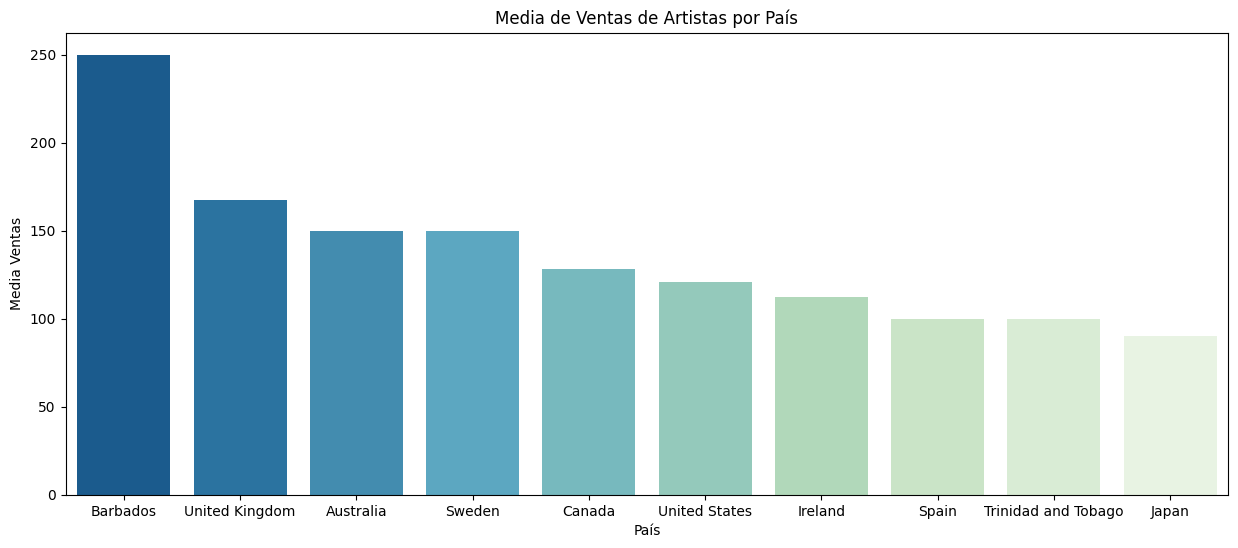

In [18]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Country', y='A_Sales_Millions', data=ventas_mean_df[0:10], palette= palette)
plt.title('Media de Ventas de Artistas por País')
plt.xlabel('País')
plt.ylabel('Media Ventas')
plt.show()

In [19]:
#Curiosamente la media de ventas de UK Baja porque hay varios por debajo de 200, por eso la primera es de Barbados con 250M de media, siendo Rihanna la única de allí

#### Hipótesis 1.3: "La mayoría de artistas clásicos son del milenio pasado"

In [20]:
unique_artists = best_selling_alltime["Artist"].nunique()
unique_artists

121

In [21]:
filtro_milenio = best_selling_alltime["Year"] < 2000
unique_artists_milenio = best_selling_alltime["Artist"][filtro_milenio].nunique()
unique_artists_milenio

97

In [22]:
filtro_Y2K = best_selling_alltime["Year"] >= 2000
unique_Y2K = best_selling_alltime["Artist"][filtro_Y2K].nunique()
unique_Y2K

24

In [23]:
round((unique_artists_milenio / unique_artists)*100,2)

80.17

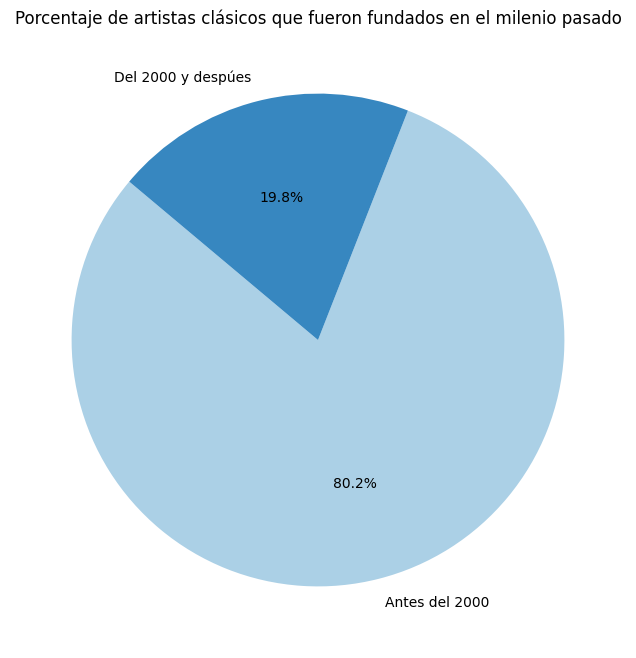

In [24]:
etiquetas1 = ['Antes del 2000', 'Del 2000 y despúes']
porciones = [unique_artists_milenio, unique_Y2K]

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(porciones, labels=etiquetas1, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Blues", 2))
plt.title('Porcentaje de artistas clásicos que fueron fundados en el milenio pasado')
plt.show()

In [50]:
filtro_80s = best_selling_alltime["Year"] <= 1985
unique_80s = best_selling_alltime["Artist"][filtro_80s].nunique()
unique_80s

73

In [51]:
round((unique_80s / unique_artists)*100,2)

60.33

In [52]:
filtro_80s2 = best_selling_alltime["Year"] > 1985
unique_80s2 = best_selling_alltime["Artist"][filtro_80s2].nunique()
unique_80s2

48

In [53]:
round((unique_80s2 / unique_artists)*100,2)

39.67

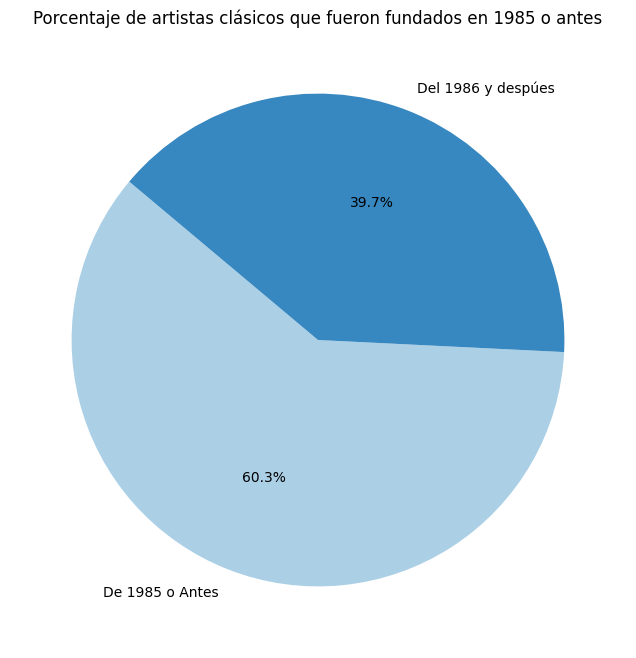

In [55]:
etiquetas1 = ['De 1985 o Antes', 'Del 1986 y despúes']
porciones = [unique_80s, unique_80s2]

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(porciones, labels=etiquetas1, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Blues", 2))
plt.title('Porcentaje de artistas clásicos que fueron fundados en 1985 o antes')
plt.show()

####  Hipótesis 2: "Los géneros más populares son el rock y el pop"

In [26]:
unique_genders = merge_best["Genre"].nunique()
unique_genders

83

In [27]:
genero_popu = pd.DataFrame(merge_best["Genre"].value_counts()[0:10])
genero_popu

,count
Genre,
Rock / pop,29
Rock,21
Folk / rock,14
Rock and roll / pop / country,13
Rock / blues rock,10
Pop / rock,9
Rock / pop / surf rock,8
Hard rock / blues rock / folk rock,6
Hard rock / heavy metal,5


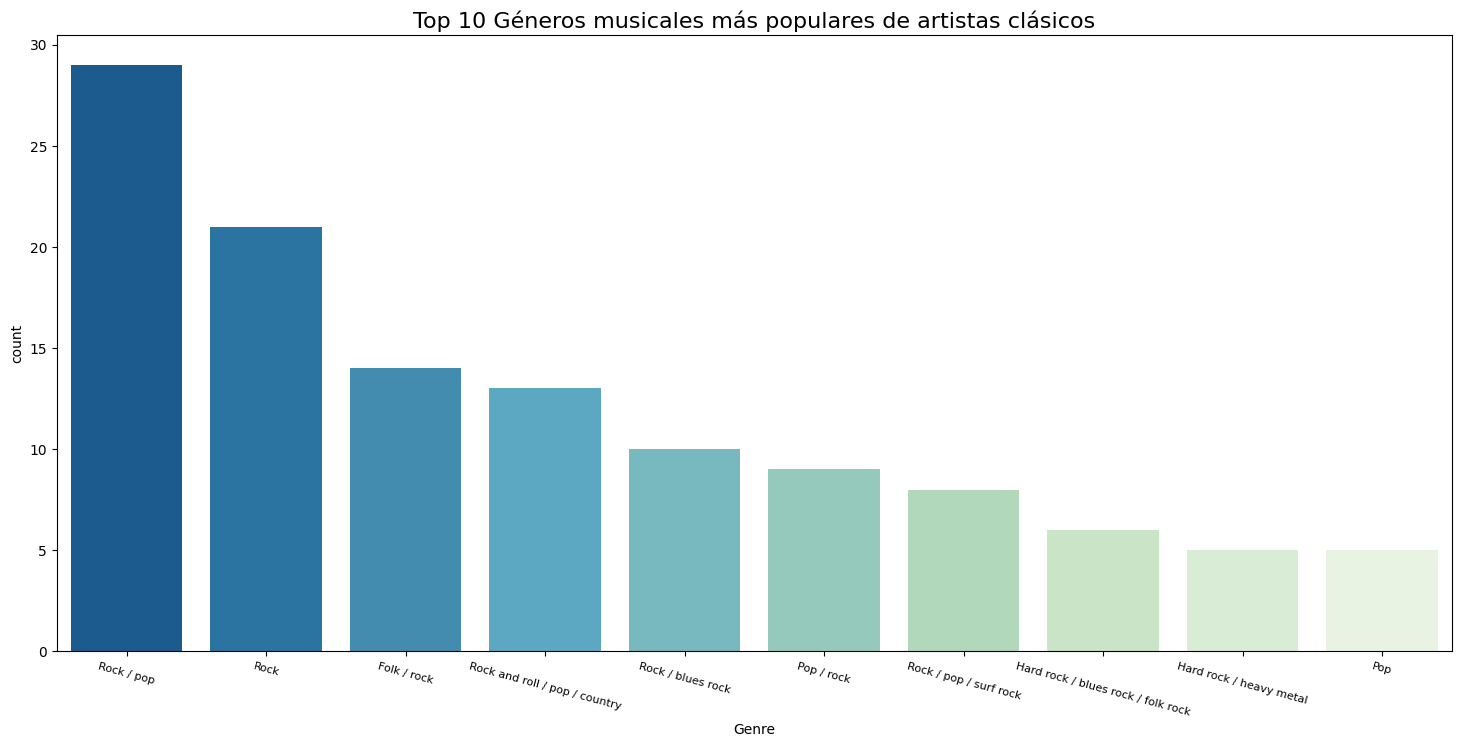

In [28]:
plt.figure(figsize=(18, 8))
sns.barplot(x='Genre', y='count', data = genero_popu, palette=palette, hue = 'Genre')
plt.title('Top 10 Géneros musicales más populares de artistas clásicos', fontsize=16)
plt.xticks(fontsize = 8, rotation = -15)
plt.show()

In [29]:
generos_popus = pd.DataFrame(best_selling_alltime["Genre"].value_counts()[0:10])
generos_popus

,count
Genre,
Rock,9
Rock / pop,7
Pop,5
Hip-hop,4
Pop / rock,4
Hard rock / heavy metal,4
R&B / pop,3
Pop / R&B,3
Country,3


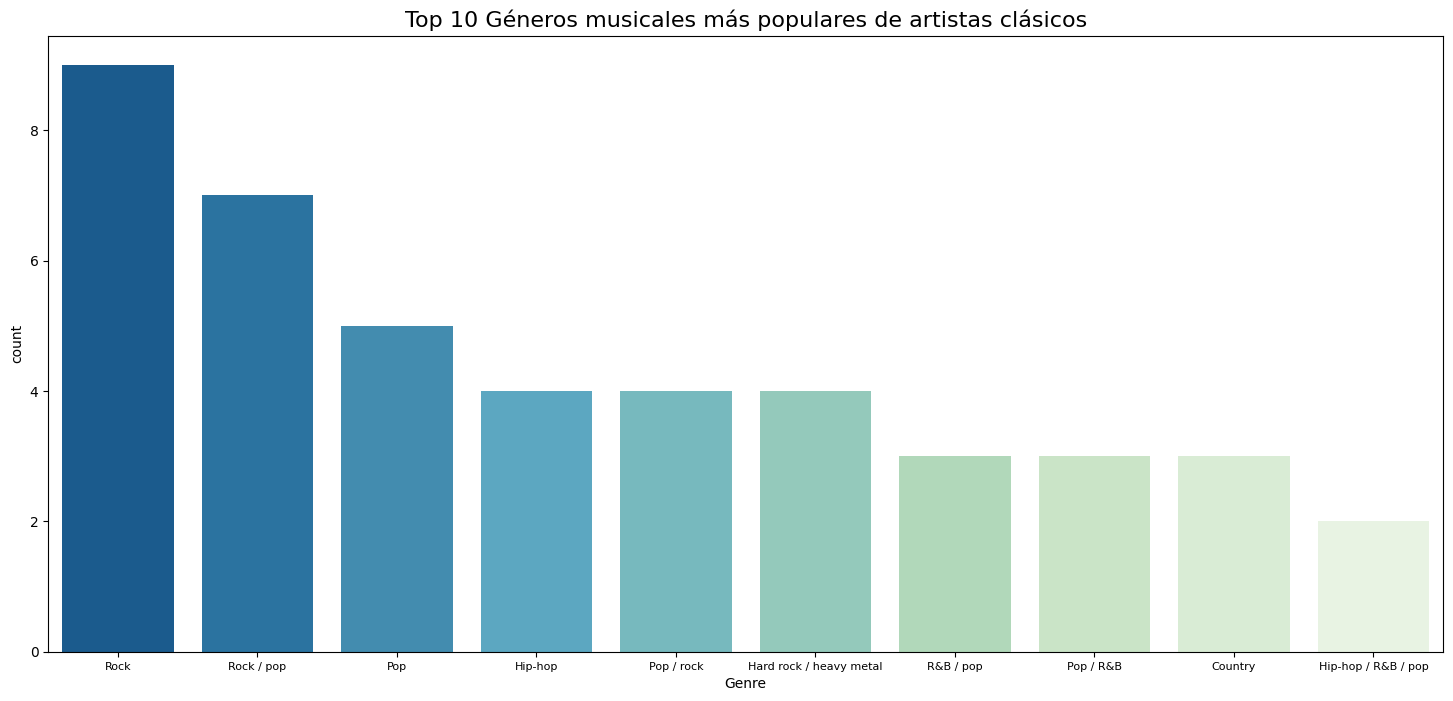

In [30]:
plt.figure(figsize=(18, 8))
sns.barplot(x='Genre', y='count', data = generos_popus, palette=palette, hue = 'Genre')
plt.title('Top 10 Géneros musicales más populares de artistas clásicos', fontsize=16)
plt.xticks(fontsize = 8)
plt.show()

In [31]:
generos_popus2 = pd.DataFrame(top_songs2000_2019["Genre"].value_counts()[0:10])
generos_popus2


,count
Genre,
pop,428
"hip hop, pop",277
"hip hop, pop, R&B",244
"pop, Dance/Electronic",221
"pop, R&B",178
hip hop,124
"hip hop, pop, Dance/Electronic",78
rock,58
"rock, pop",43


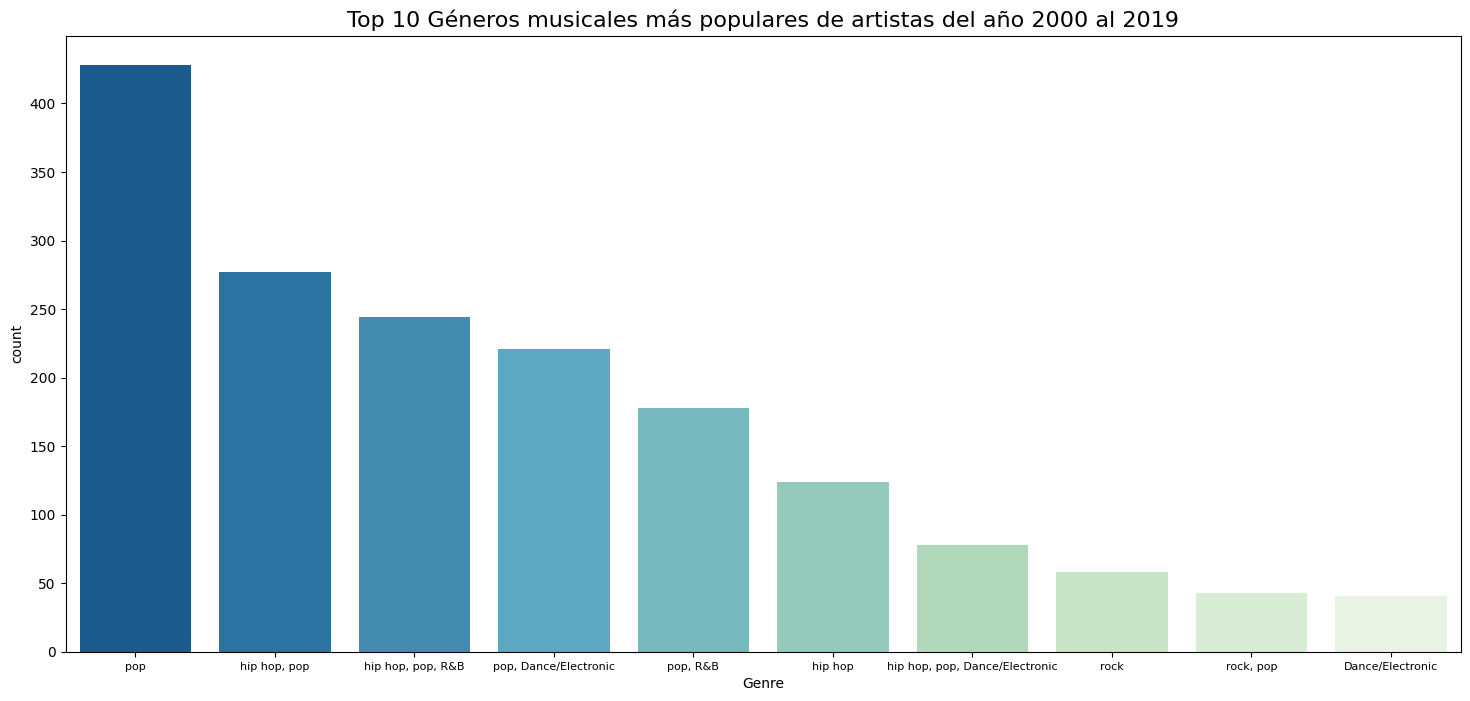

In [32]:
plt.figure(figsize=(18, 8))
sns.barplot(x='Genre', y='count', data = generos_popus2, palette= palette, hue = "Genre")
plt.title('Top 10 Géneros musicales más populares de artistas del año 2000 al 2019', fontsize=16)
plt.xticks(fontsize = 8)
plt.show()

#### ~ Pop y rock 2000-2019

In [33]:
#Filtro pop
filtro_pop = top_songs2000_2019["Genre"] == 'pop'

#Filtro rock
filtro_rock = top_songs2000_2019["Genre"] == 'rock'

#Filtro rock/ pop
filtro_rockpop = top_songs2000_2019["Genre"] == 'rock, pop'

In [34]:
cantidad_gen_anios =pd.DataFrame(top_songs2000_2019["Released"][filtro_pop].value_counts())

cantidad_gen_anios["count_rock"] = top_songs2000_2019["Released"][filtro_rock].value_counts()

cantidad_gen_anios["count_rp"] = top_songs2000_2019["Released"][filtro_rockpop].value_counts()


cantidad_gen_anios.fillna(0, inplace = True)
cantidad_gen_anios.sort_index(ascending= True)
cantidad_gen_anios.sort_values("Released",inplace= True)
cantidad_gen_anios.reset_index(inplace =  True)
cantidad_gen_anios

,Released,count,count_rock,count_rp
0,1999,11,1.0,2.0
1,2000,16,1.0,1.0
2,2001,25,0.0,5.0
3,2002,19,2.0,3.0
4,2003,15,2.0,4.0
5,2004,15,4.0,0.0
6,2005,10,6.0,4.0
7,2006,26,10.0,2.0
8,2007,13,7.0,1.0
9,2008,22,2.0,2.0


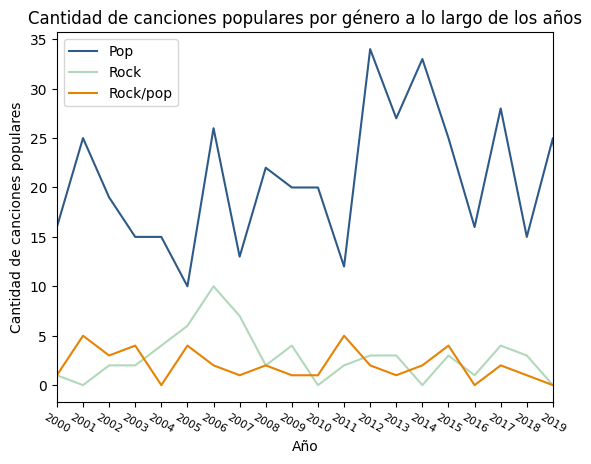

In [35]:
plt.plot(cantidad_gen_anios["Released"], cantidad_gen_anios["count"],'-', color = "#2E5A89", label = "Pop")
plt.plot(cantidad_gen_anios["Released"], cantidad_gen_anios["count_rock"],'-', color = "#B1D8BA", label = "Rock")
plt.plot(cantidad_gen_anios["Released"], cantidad_gen_anios["count_rp"],'-', color = "#E88203", label = "Rock/pop")

plt.xlabel('Año')
plt.ylabel('Cantidad de canciones populares')
plt.xlim(2000,2019)
plt.title('Cantidad de canciones populares por género a lo largo de los años')
plt.xticks(cantidad_gen_anios["Released"][1:-1], rotation = -30, fontsize = 8)

plt.legend();




#### Hipótesis 3: Mientras más bailable sea una canción,menos acustica será.
Considerar pandemia: entre 2000 y 2019 vs 2023
La pandemia parece haber tenido un impacto en la música: se empieza a abordar temas como la esperanza, el aislamiento, además hubo un mayor enfoque en música relajante y de bienestar.


In [36]:
porcentaje_baile = top_songs2000_2019["danceability"] * 100
porcentaje_acustico = top_songs2000_2019["acousticness"] * 100

##### Scatterplot relaición bailable y acustica

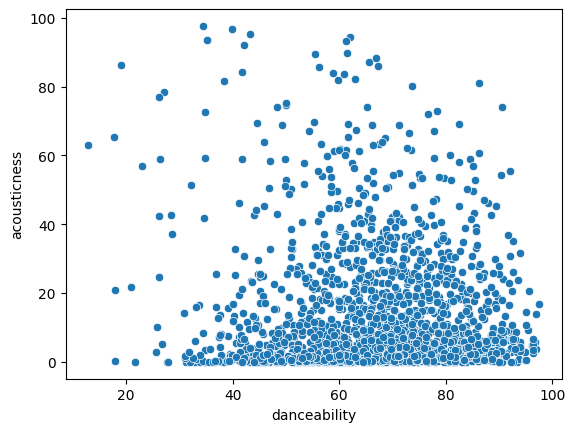

In [37]:
sns.scatterplot(x = porcentaje_baile, y = porcentaje_acustico);

#mucho bailable pero pocas son acusticas, aunque no hay correlación clara

In [38]:
porcentaje_baile2 = spotify_songs2023["danceability"]
porcentaje_acustico2 = spotify_songs2023["acousticness"]

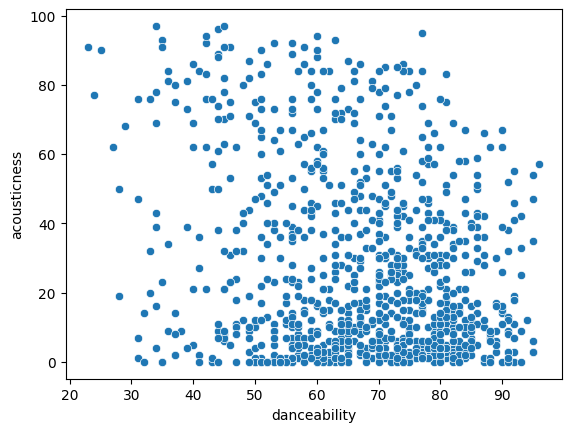

In [39]:
sns.scatterplot(x = porcentaje_baile2, y = porcentaje_acustico2);
#incremento en la variedad de acustico

In [40]:
porcentaje_energy = top_songs2000_2019["energy"] * 100
porcentaje_valence = top_songs2000_2019["valence"] * 100

#### Hipótesis 3.2: Mientras más energía tenga una canción,más valencia será.

##### Scatterplot relación energía y valencia

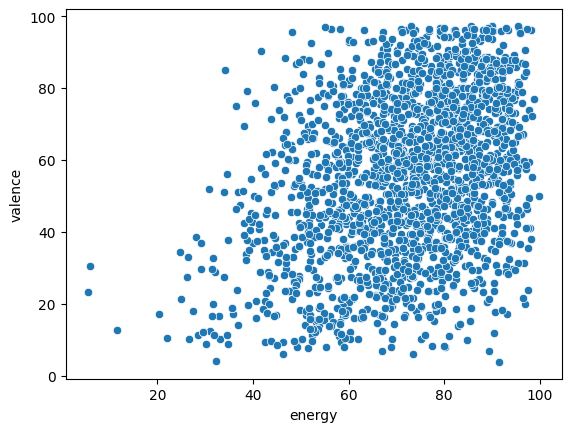

In [41]:
sns.scatterplot(x = porcentaje_energy, y = porcentaje_valence);

In [42]:
porcentaje_energy2 = spotify_songs2023["energy"]
porcentaje_valence2 = spotify_songs2023["valence"]

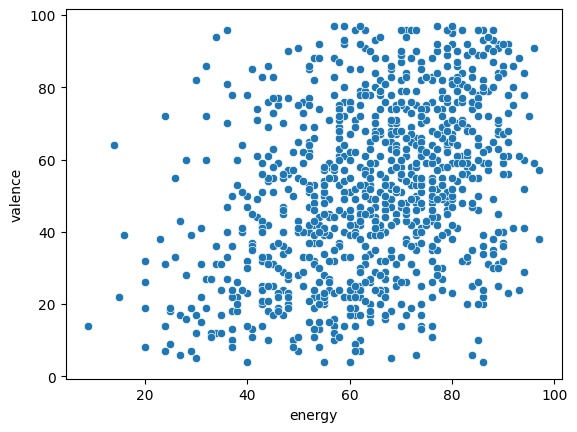

In [43]:
sns.scatterplot(x = porcentaje_energy2, y = porcentaje_valence2);

In [44]:
baile_acustic_valence = top_songs2000_2019[["danceability","acousticness","valence", "energy"]]

##### Matriz de correlación

In [45]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap

In [46]:
"""colors = [
    (-1, "#E88203"), 
    (-0.75, "#E8B950"), 
    (-0.50, "#E8D981"), 
    (-0.25, "#FFF3B7"), 
    (0, "#E8F3E3"), 
    (0.25, "#B1D8BA"), 
    (0.50, "#77B9BE"),  
    (0.75, "#438CAF"),   
    (1, "#2E5A89")    
]"""

colors = ["#E88203","#E8B950","#E8D981","#FFF3B7", "#E8F3E3",  "#B1D8BA","#77B9BE","#438CAF","#2E5A89"]

#custom_cmap = LinearSegmentedColormap.from_list("custom_cmap",colors)
cmap = ListedColormap(sns.color_palette(colors).as_hex())

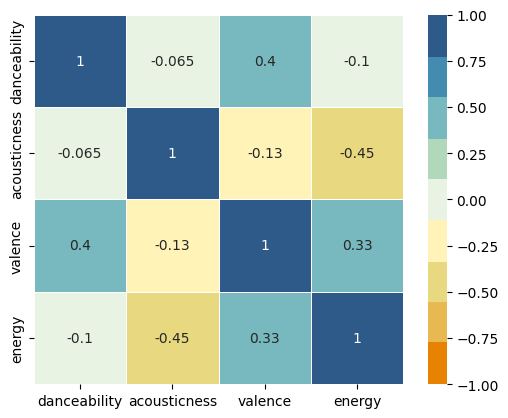

In [47]:
sns.heatmap(baile_acustic_valence.corr(),vmin= -1, vmax=1, center=0,
            cmap= cmap,square=True, linewidths=.5, annot=True);

In [48]:
baile_acustic_valence2 = spotify_songs2023[["danceability","acousticness","valence", "energy"]]

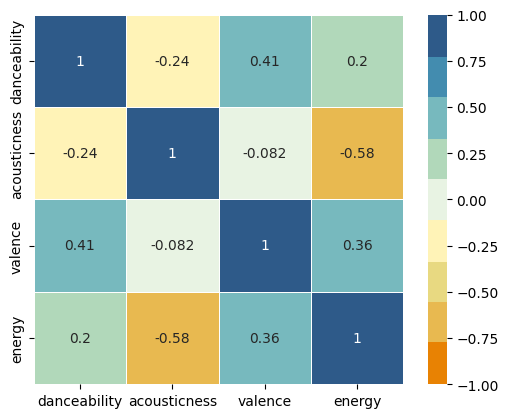

In [49]:
sns.heatmap(baile_acustic_valence2.corr(),vmin=-1, vmax=1,center=0,
            cmap= cmap,
            square=True, linewidths=.5, annot=True);